# Estimate MP parameters for Zimmer data

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_float
from scipy.io import savemat

from otimage import io, viewers
from otimage.utils import plot_img_units, plot_maxproj_units
from otimage.imagerep import mp_gaussian, reconstruct_mp_image

## Load single frame to test on

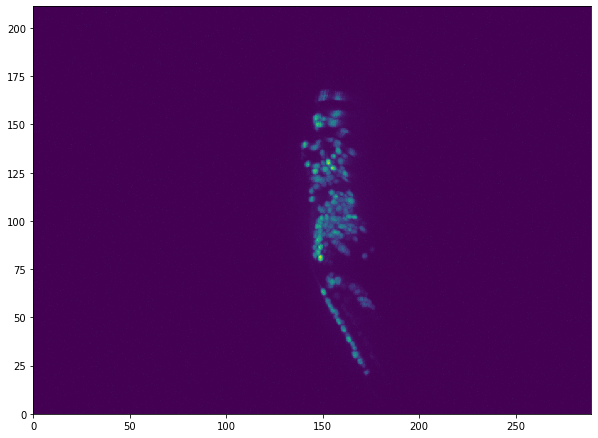

In [3]:
in_fpath = '/home/mn2822/Desktop/WormOT/data/zimmer/raw/mCherry_v00065-00115.hdf5'
t_frame = 5

with io.ZimmerReader(in_fpath) as reader:
    units = reader.units
    img = reader.get_frame(t_frame)

plt.figure(figsize=(10, 10))
plot_maxproj_units(img, units);

## Run MP algorithm on frame

### Set parameters

The size of a *C. elegans* neuron is 2-3 microns (http://www.wormbook.org/chapters/www_intromethodsneurophys/intromethodsneurophys.html). Ideally, the MP component covariance should be set to cover a single cell.

In [4]:
# Covariance values for each dimension
cov = np.diag([0.4, 0.4, 0.4])

# Number of MP iterations to run
n_iter = 300

### Run MP on frame

In [5]:
mp, debug = mp_gaussian(img, units, cov, n_iter)

## Plot results

In [6]:
img_recon = reconstruct_mp_image(mp, units)
img_diff = img - img_recon

### Projections of MP reconstruction

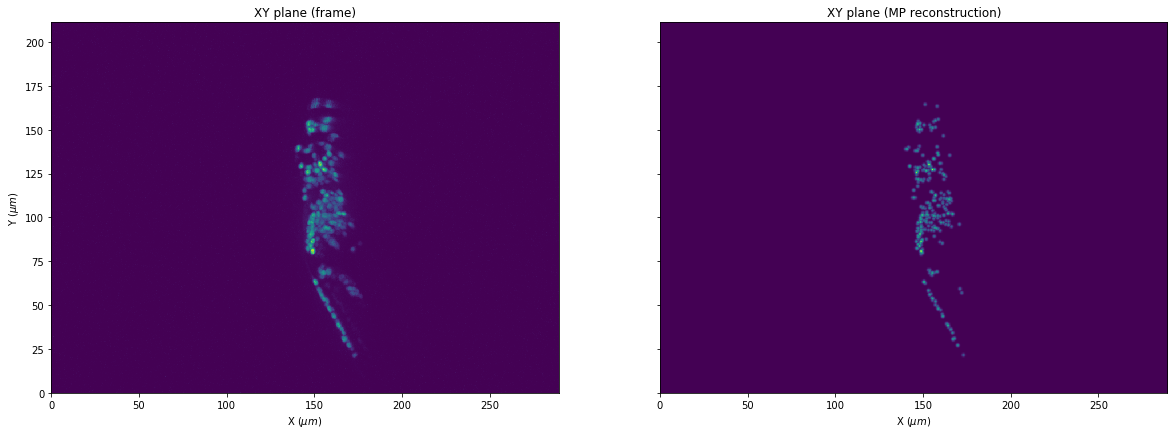

In [7]:
xy_units = np.array([units[0], units[1]])
xy_maxproj_img = np.max(img, 2)
xy_maxproj_recon = np.max(img_recon, 2)

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(20, 7), sharex=True, sharey=True)

plot_img_units(xy_maxproj_img, xy_units, ax=ax_1)
ax_1.set_title('XY plane (frame)')
ax_1.set_xlabel('X $(\mu m)$')
ax_1.set_ylabel('Y $(\mu m)$')

plot_img_units(xy_maxproj_recon, xy_units, ax=ax_2)
ax_2.set_title('XY plane (MP reconstruction)')
ax_2.set_xlabel('X $(\mu m)$');

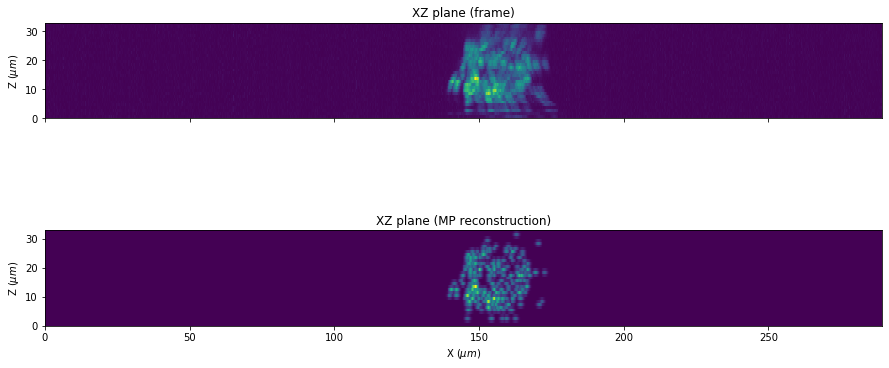

In [8]:
xz_units = np.array([units[0], units[2]])
xz_maxproj_img = np.max(img, 1)
xz_maxproj_recon = np.max(img_recon, 1)

fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)

plot_img_units(xz_maxproj_img, xz_units, ax=ax_1)
ax_1.set_title('XZ plane (frame)')
ax_1.set_ylabel('Z $(\mu m)$')

plot_img_units(xz_maxproj_recon, xz_units, ax=ax_2)
ax_2.set_title('XZ plane (MP reconstruction)')
ax_2.set_xlabel('X $(\mu m)$')
ax_2.set_ylabel('Z $(\mu m)$');

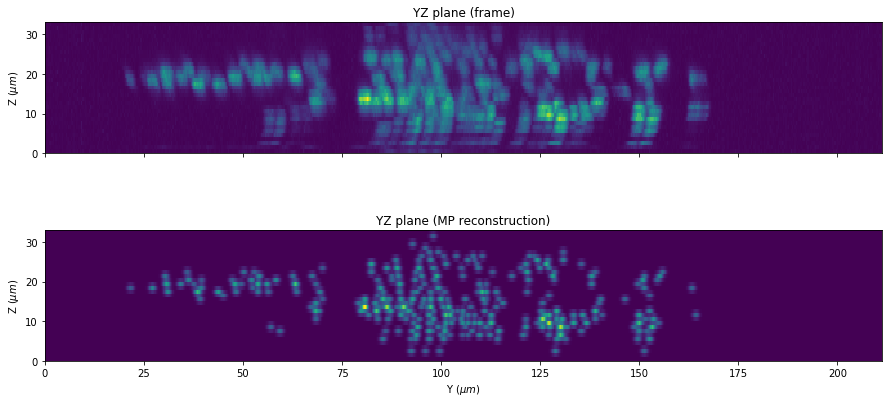

In [9]:
yz_units = np.array([units[1], units[2]])
yz_maxproj_img = np.max(img, 0)
yz_maxproj_recon = np.max(img_recon, 0)

fig, (ax_1, ax_2) = plt.subplots(2, 1, figsize=(15, 7), sharex=True, sharey=True)

plot_img_units(yz_maxproj_img, yz_units, ax=ax_1)
ax_1.set_title('YZ plane (frame)')
ax_1.set_ylabel('Z $(\mu m)$')

plot_img_units(yz_maxproj_recon, yz_units, ax=ax_2)
ax_2.set_title('YZ plane (MP reconstruction)')
ax_2.set_xlabel('Y $(\mu m)$')
ax_2.set_ylabel('Z $(\mu m)$');

### Full frame and residual

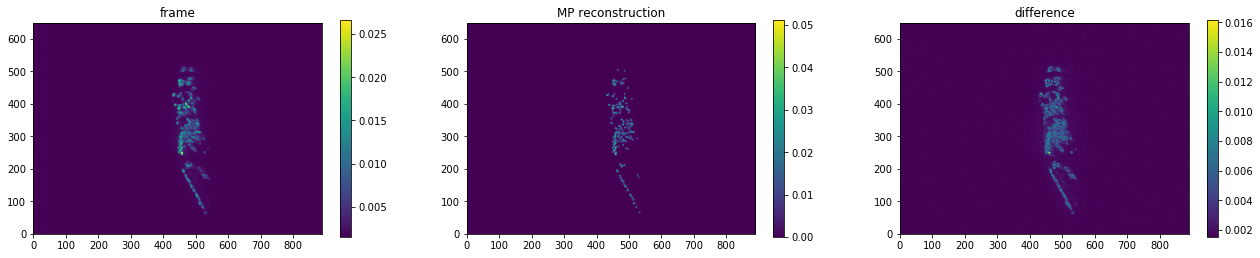

In [10]:
plt.figure(figsize=(22, 4))
    
plt.subplot(131)
plt.imshow(np.max(img, 2).T, origin='lower')
plt.title('frame')
plt.colorbar()
    
plt.subplot(132)
plt.imshow(np.max(img_recon, 2).T, origin='lower')
plt.title('MP reconstruction')
plt.colorbar()

plt.subplot(133)
plt.imshow(np.max(img_diff, 2).T, origin='lower');
plt.title('difference')
plt.colorbar()

### Zoomed-in frame and residual

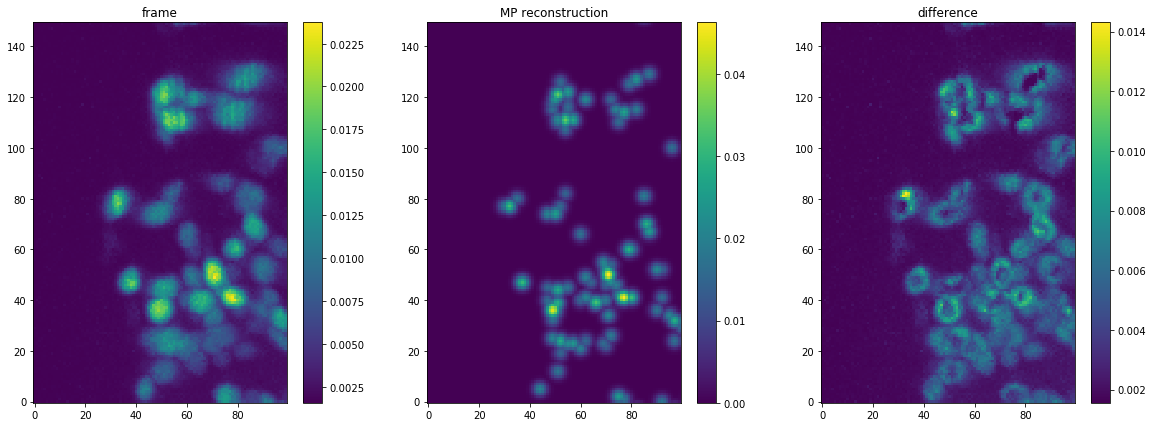

In [11]:
xmin, xmax = (400, 500)
ymin, ymax = (350, 500)

img_zoom = img[xmin:xmax, ymin:ymax, :]
img_recon_zoom = img_recon[xmin:xmax, ymin:ymax, :]
img_diff_zoom = img_diff[xmin:xmax, ymin:ymax, :]

plt.figure(figsize=(20, 7))
    
plt.subplot(131)
plt.imshow(np.max(img_zoom, 2).T, origin='lower')
plt.title('frame')
plt.colorbar()
    
plt.subplot(132)
plt.title('MP reconstruction')
plt.imshow(np.max(img_recon_zoom, 2).T, origin='lower')
plt.colorbar()

plt.subplot(133)
plt.title('difference')
plt.imshow(np.max(img_diff_zoom, 2).T, origin='lower');
plt.colorbar();

### Visualization widget

In [20]:
img_viewer = viewers.WormSliceViewer(img, units)

interactive(children=(RadioButtons(description='plane:', options=('XY', 'XZ', 'YZ'), style=DescriptionStyle(de…

In [21]:
recon_viewer = viewers.WormSliceViewer(img_recon, units)

interactive(children=(RadioButtons(description='plane:', options=('XY', 'XZ', 'YZ'), style=DescriptionStyle(de…